<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Customer_Churn_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

In [5]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
# duplicates
df.duplicated().sum()

0

In [15]:
df=df.drop(columns=['customerID'])

In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [19]:
# printing unique values in all columns
for col in df.columns:
  print(f'{col}: {df[col].unique()}')
  print("*"*50)

gender: ['Female' 'Male']
**************************************************
SeniorCitizen: [0 1]
**************************************************
Partner: ['Yes' 'No']
**************************************************
Dependents: ['No' 'Yes']
**************************************************
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
PhoneService: ['No' 'Yes']
**************************************************
MultipleLines: ['No phone service' 'No' 'Yes']
**************************************************
InternetService: ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity: ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup: ['Yes' 'No' 'No internet service

In [21]:
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(f'{col}: {df[col].unique()}')
    print("*"*50)

gender: ['Female' 'Male']
**************************************************
SeniorCitizen: [0 1]
**************************************************
Partner: ['Yes' 'No']
**************************************************
Dependents: ['No' 'Yes']
**************************************************
PhoneService: ['No' 'Yes']
**************************************************
MultipleLines: ['No phone service' 'No' 'Yes']
**************************************************
InternetService: ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity: ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup: ['Yes' 'No' 'No internet service']
**************************************************
DeviceProtection: ['No' 'Yes' 'No internet service']
**************************************************
TechSupport: ['No' 'Yes' 'No internet service']
**************************************************
StreamingTV: ['No' 'Yes' '

In [23]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
len(df[df['TotalCharges']==' '])

11

In [25]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0.0")

In [26]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
# checking dist of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [29]:
#  EDA
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
# Numerical features analysis understanding dist
def plot_hist(df,column_name):
  plt.figure(figsize=(10,5))
  sns.histplot(df[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')


  # calculate mean ans median
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  plt.axvline(col_mean, color='r', linestyle='dashed', linewidth=2,label="Mean")
  plt.axvline(col_median, color='g', linestyle='dashed', linewidth=2,label="Median")
  plt.legend()
  plt.show()


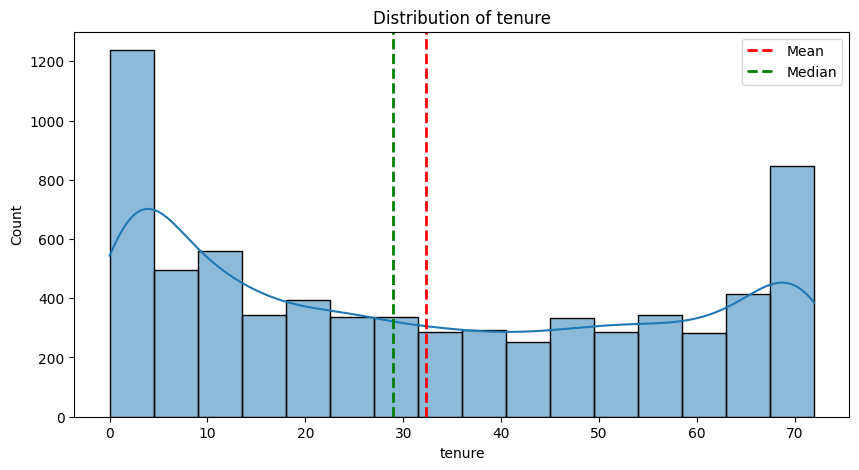

In [33]:
plot_hist(df,'tenure')

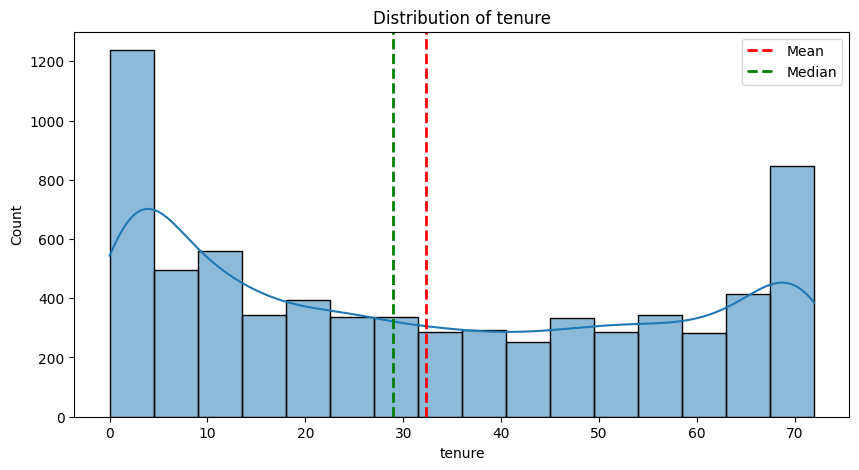

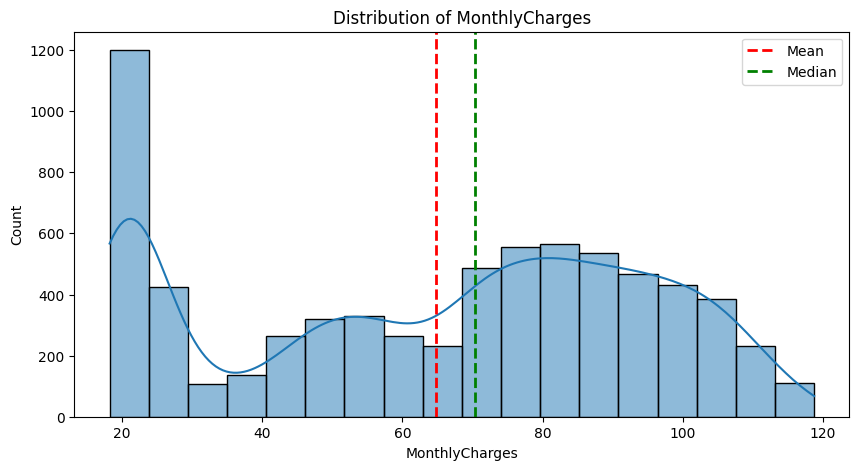

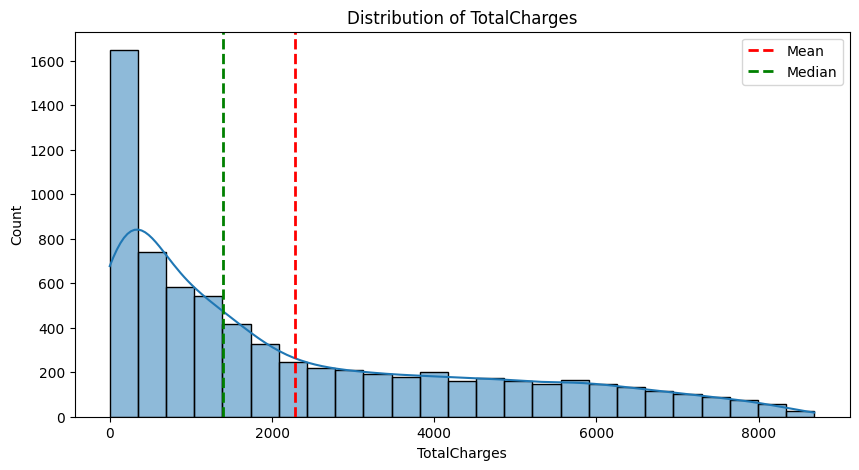

In [36]:
for col in df.columns:
  if col in numerical_features_list:
    plot_hist(df,col)


In [37]:
def plot_box_plot(df,col):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

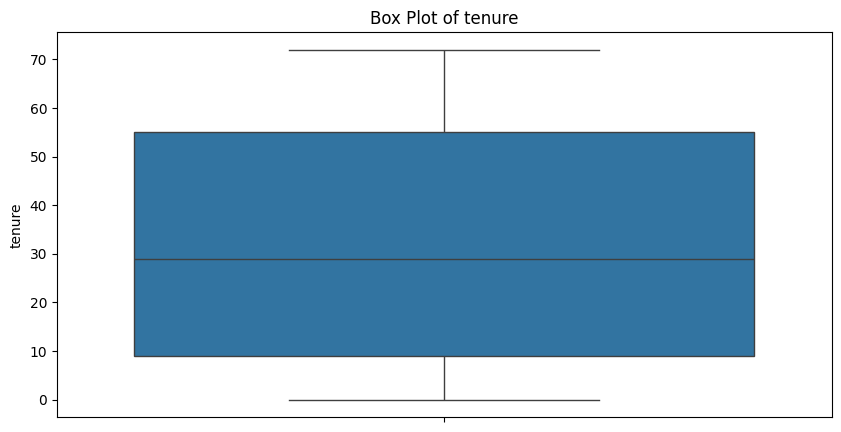

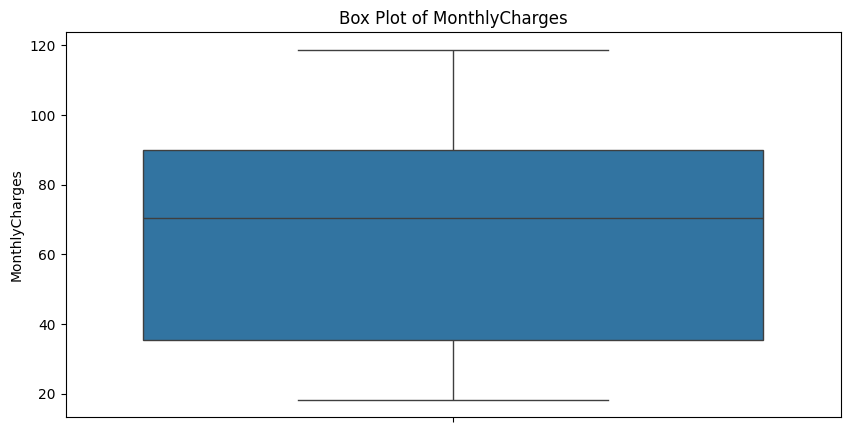

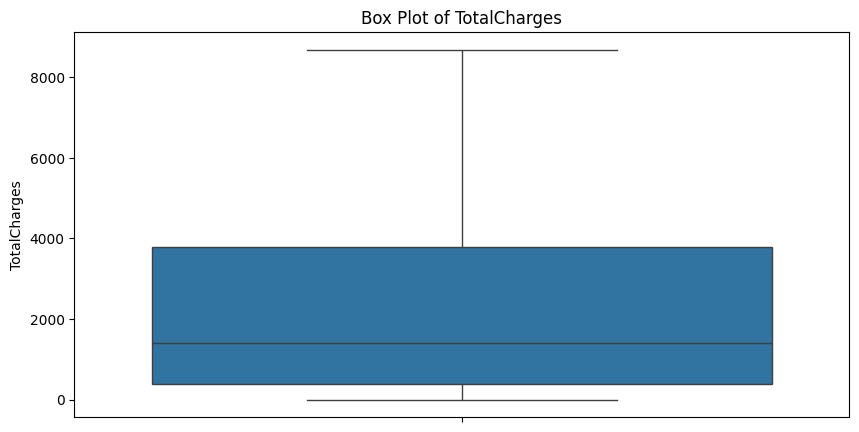

In [38]:
for col in df.columns:
  if col in numerical_features_list:
    plot_box_plot(df,col)


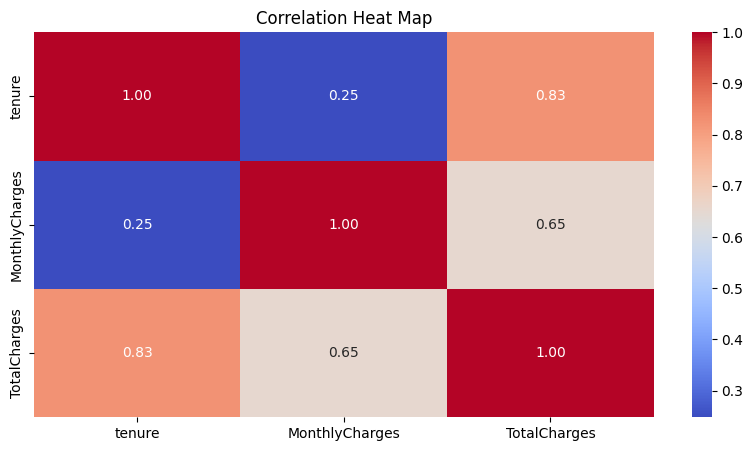

In [40]:
# Correlation heat map for numerical
# columns in order to get insights about multicolinearity problem
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_features_list].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

In [41]:
# Categorical features
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
categorical_features_col_list=df.select_dtypes(include='object').columns.to_list()
categorical_features_col_list=["SeniorCitizen"]+categorical_features_col_list

In [45]:
categorical_features_col_list

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

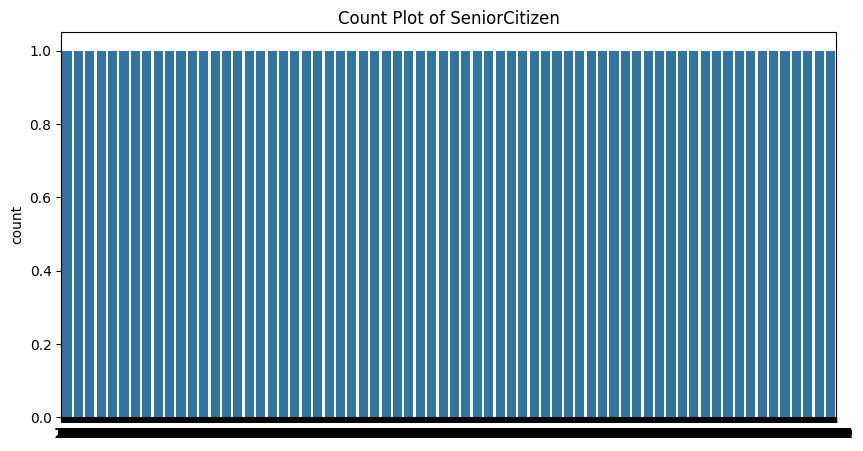

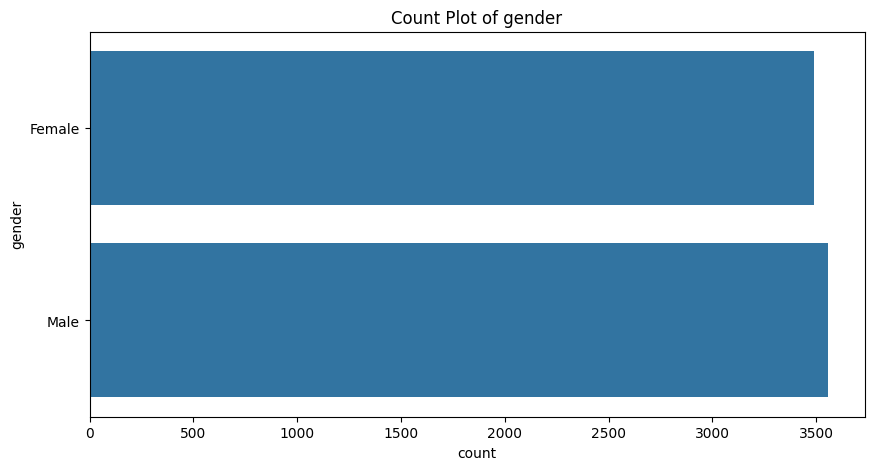

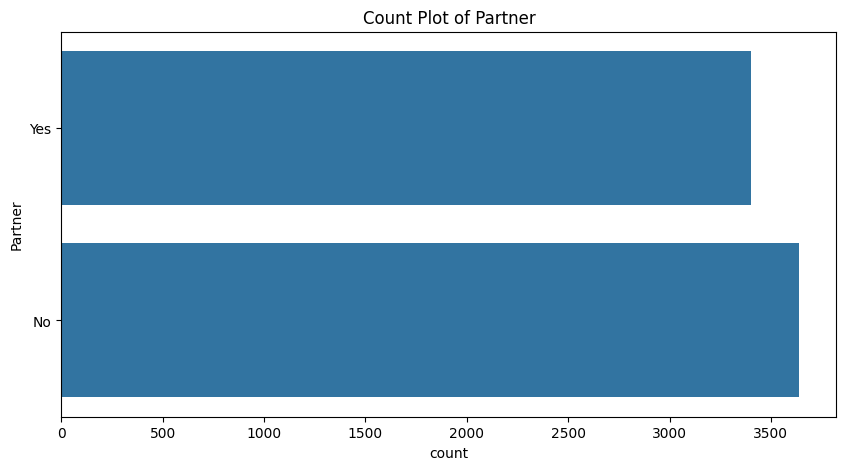

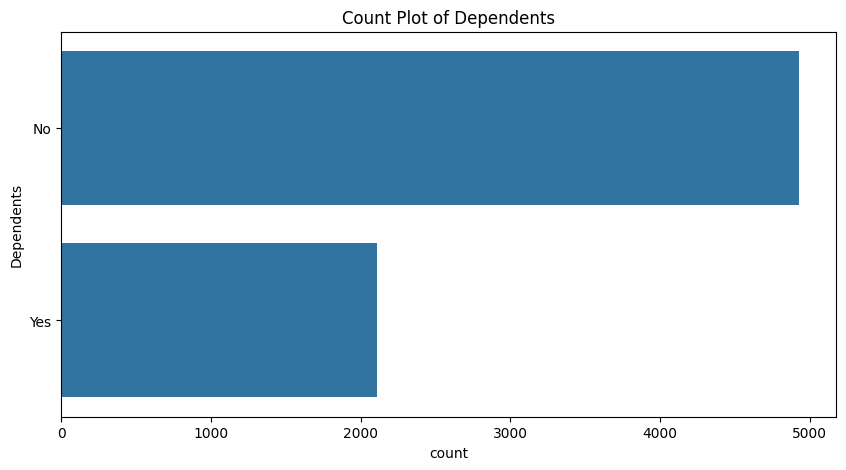

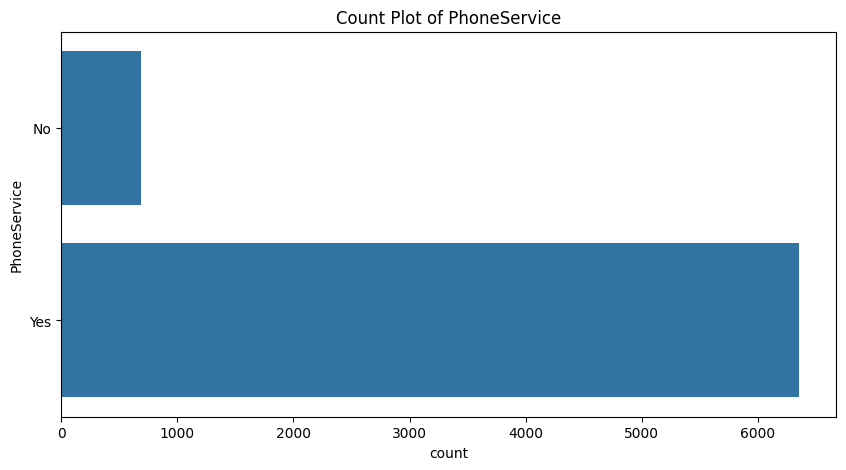

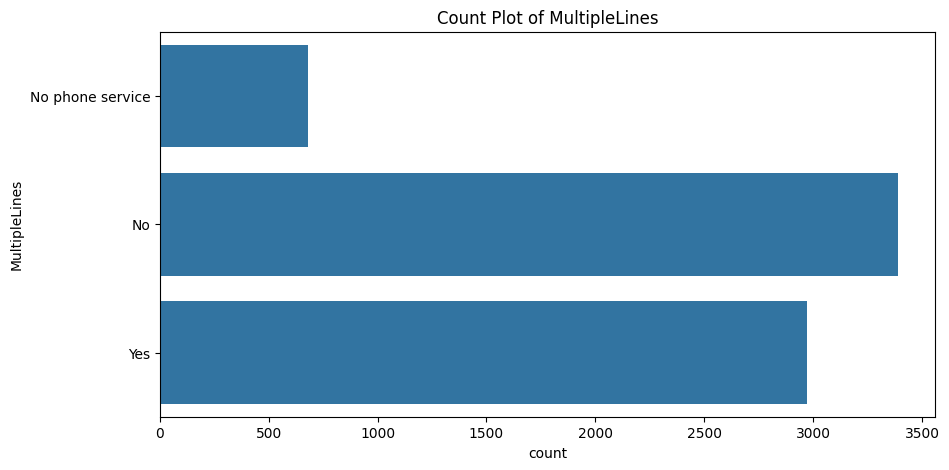

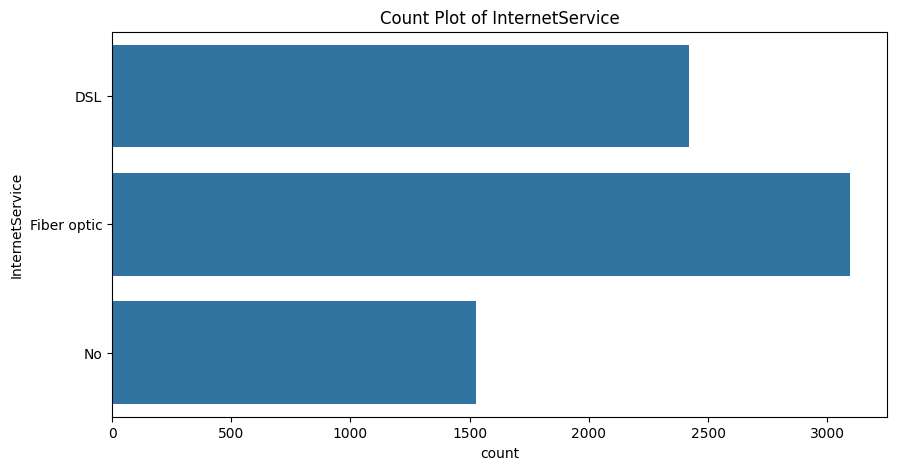

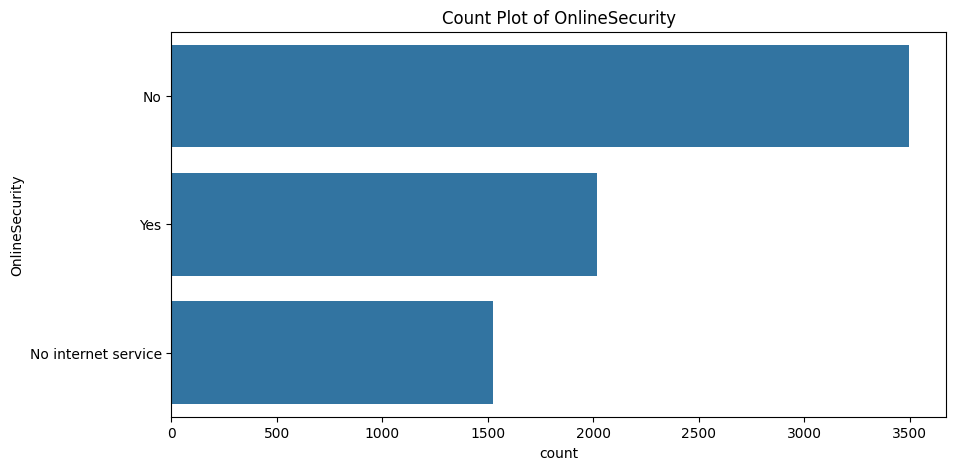

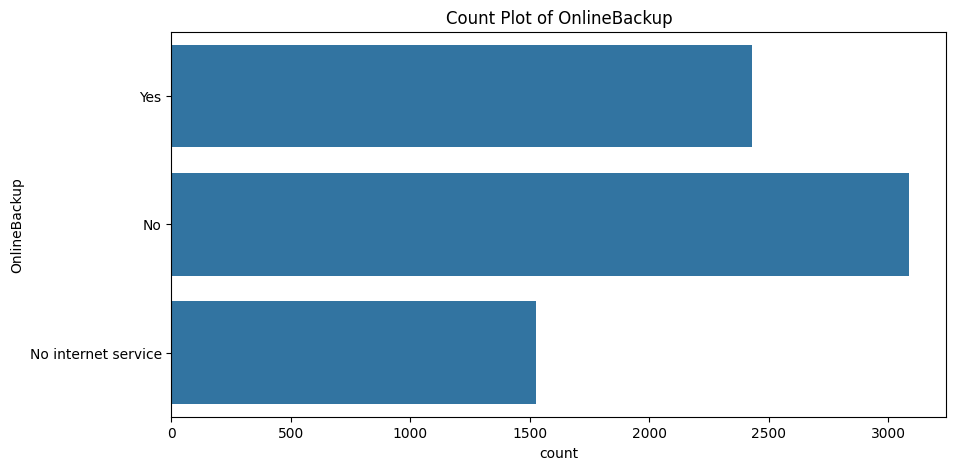

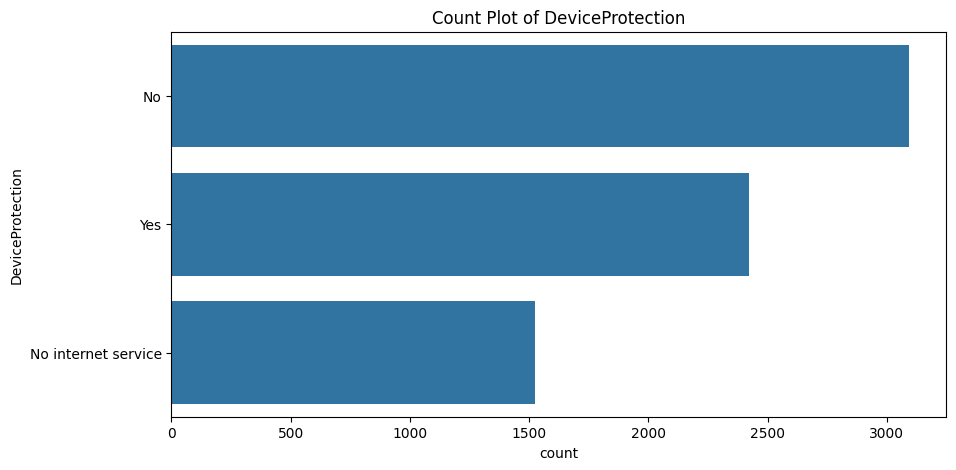

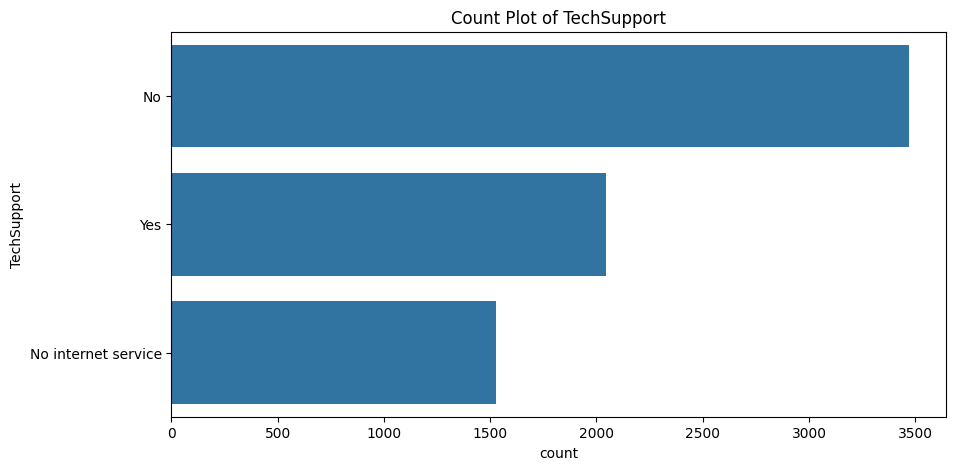

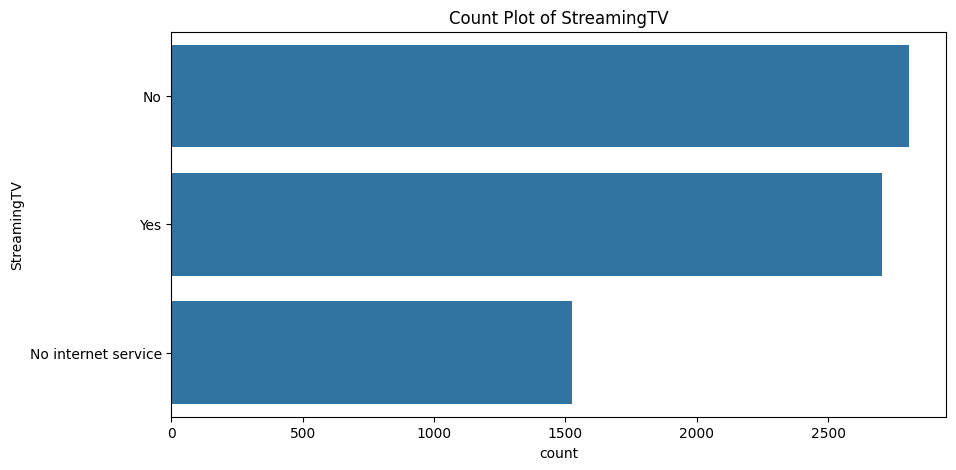

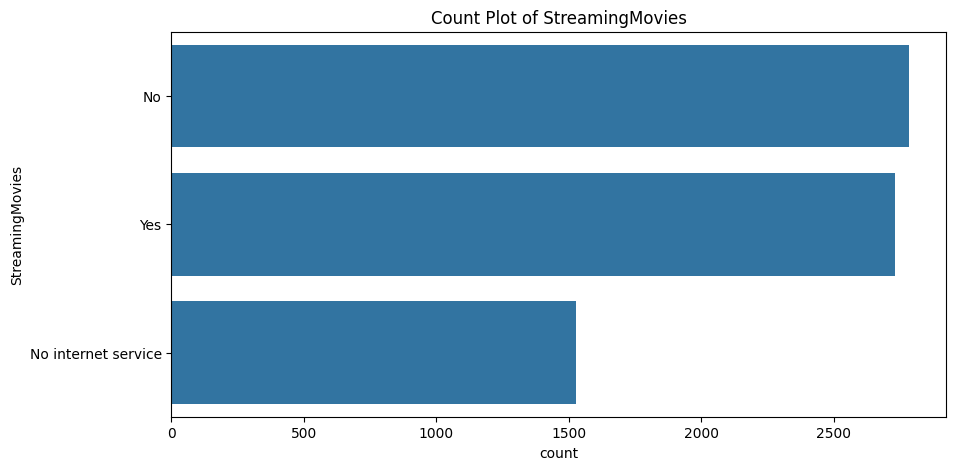

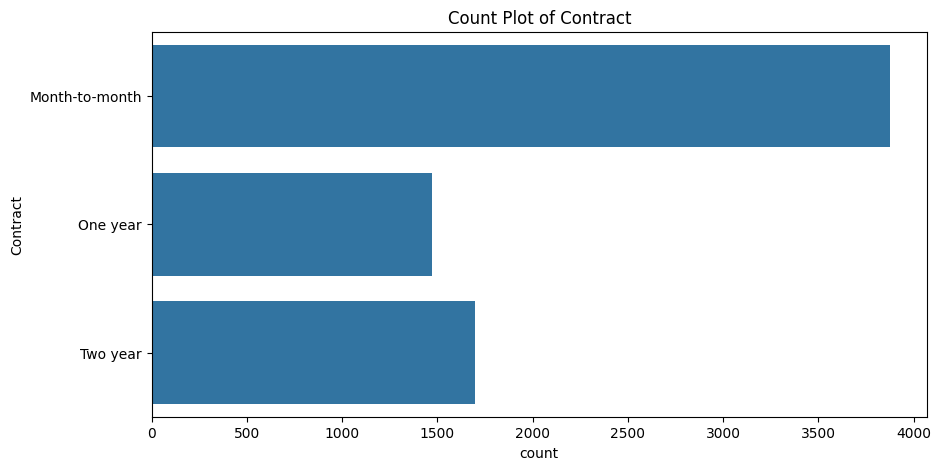

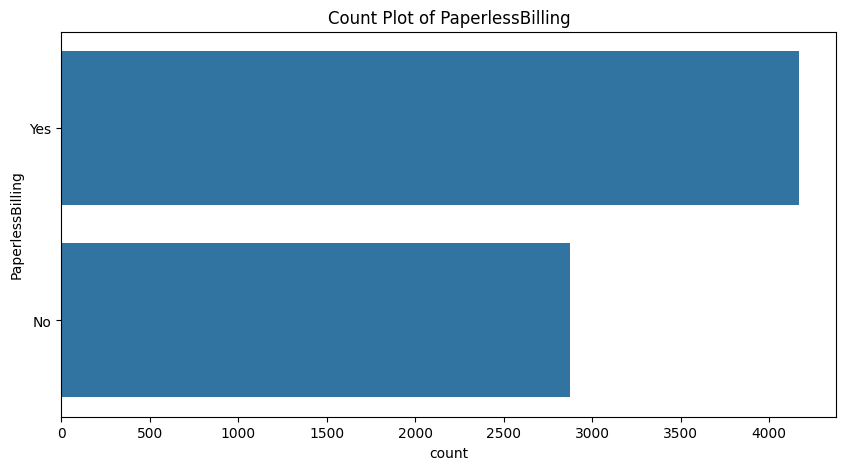

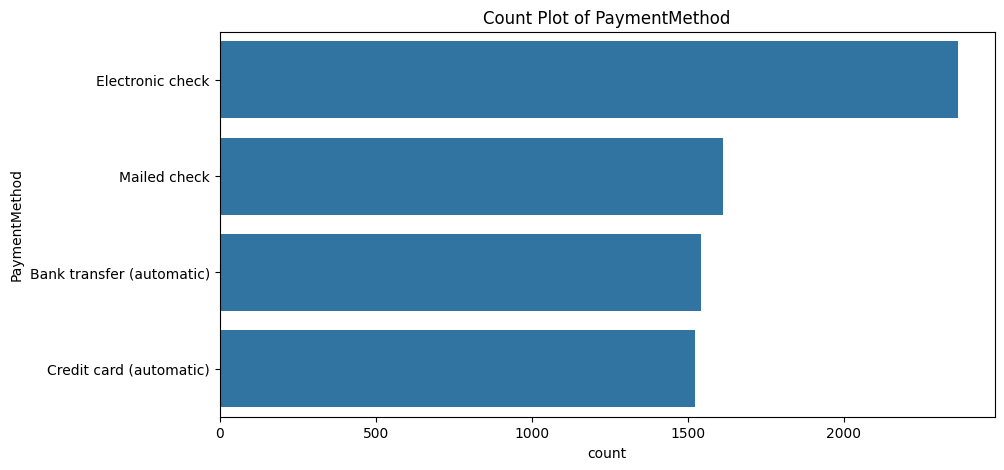

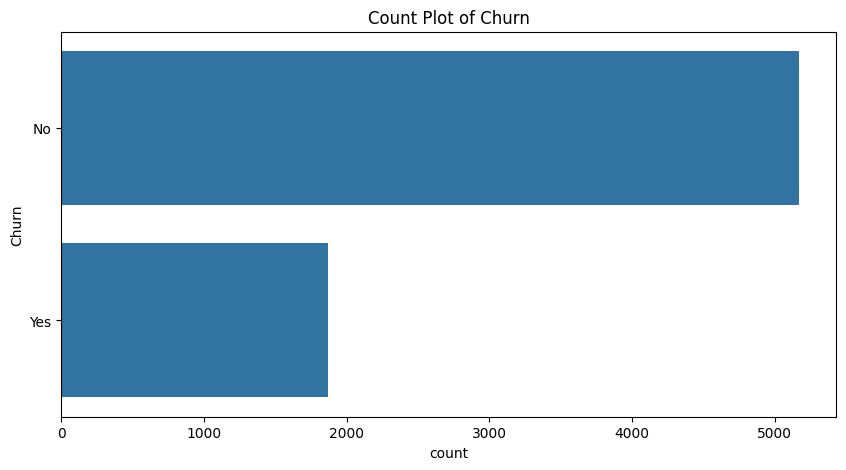

In [46]:
for col in categorical_features_col_list:
  plt.figure(figsize=(10,5))
  sns.countplot(df[col])
  plt.title(f'Count Plot of {col}')
  plt.show()

In [47]:
# imbalance in feature dist is not an
#  issue but imbalance in target column ha to be addressed


In [48]:
df['Churn']=df['Churn'].replace({"Yes":1,"No":0})

In [49]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [50]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [51]:
# Data Processing
# Apply Label Encoder
#identify col with object dtype
obj_col_list=df.select_dtypes(include='object').columns
print(obj_col_list)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [52]:
# Intialize a dictionary
encoders={}
for col in obj_col_list:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

# save encoders to pickle
with open('encoders.pkl','wb') as f:
  pickle.dump(encoders,f)

In [53]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [55]:
# Training and test
X=df.drop(columns=['Churn'])
Y=df['Churn']

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5634, 19) (1409, 19)
(5634,) (1409,)


In [58]:
# SMOTE
smote=SMOTE(random_state=42)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [59]:
print(X_train_smote.shape,Y_train_smote.shape)

(8276, 19) (8276,)


In [60]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [61]:
# Model Training
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [62]:
# dictionary to store cross_val_results
cv_scores={}

for model_name,model in models.items():
  print(model_name)
  print(model)
  print(f'Training {model_name} with default parameters')
  scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name]=scores
  print(f'CV Scores: {scores}')
  print(f'Mean CV Score: {scores.mean()}')
  print("*"*50)

Decision Tree
DecisionTreeClassifier(random_state=42)
Training Decision Tree with default parameters
CV Scores: [0.68297101 0.71299094 0.82175227 0.83564955 0.83564955]
Mean CV Score: 0.7778026621130524
**************************************************
Random Forest
RandomForestClassifier(random_state=42)
Training Random Forest with default parameters
CV Scores: [0.72524155 0.77824773 0.90513595 0.89425982 0.90090634]
Mean CV Score: 0.8407582789672636
**************************************************
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,


In [63]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

In [64]:
# Random Forest is Best
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

In [65]:
# evaluate on test
Y_test_Pred = rf.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_Pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_Pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_Pred))

Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [67]:
# Save model as pickle
model_data = {"model":rf, "feature_names":X.columns.tolist()}
with open("customeer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

In [68]:
# Load saved model and encoders
with open("customeer_churn_model.pkl","rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]


In [69]:
loaded_model

RandomForestClassifier(random_state=42)

In [70]:
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [71]:
# Predict
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.78 0.22]]


In [72]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
rf_model=RandomForestClassifier(random_state=42)
param_grid={
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [73]:
best_rf_model = grid_search.best_estimator_

In [74]:
print("best parameter combination",grid_search.best_params_)

best parameter combination {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [75]:
cv_score=cross_val_score(best_rf_model,X_train,Y_train,cv=5)
print("Cross Validation score;",cv_score)
print("Mean Cross Validation score:",np.mean(cv_score))

Cross Validation score; [0.81721384 0.81188997 0.78881988 0.80301686 0.79573712]
Mean Cross Validation score: 0.8033355345381645


In [76]:
#test set performance
Y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Set Accuracy:", accuracy)
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)
confusion_matrix=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Test Set Accuracy: 0.8048261178140526
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[947  89]
 [186 187]]


In [77]:
# features names save
model_data={"model":best_rf_model,"columns":list(X.columns.tolist())}
with open("model_data.pkl","wb") as file:
  pickle.dump(model_data,file)

In [78]:
# Load saved model and encoders
with open("model_data.pkl","rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["columns"]


In [79]:
# Predict
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.52626503 0.47373497]]
